In [1]:
import pandas as pd
import experiment_datasets

dataset = pd.read_csv('datasets/dataset.csv')
dataset = dataset.astype(str)


C:\Users\mrugeles\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,11,15,18,19,20,21,22,23,24,28,30,31,32,33,35,36,37,38,39,40,41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(dataset.shape)
dataset = dataset[
    (dataset['PQR_TIPOPETICION'].str.contains('tutela') ) |
    (dataset['PQR_TIPOPETICION'].str.contains('reclamo') ) 
]
print(dataset.shape)

(2375371, 46)
(1198951, 46)


In [5]:
experiment = [
'Naive',
'Basic data preparation' ,
'Adding Missing status feature',
'Missing Stat Feature / Removing 75% of null',
'Missing Stat Feature / Mode Imputing',
'Only Imputing values',
'Normalizing values ',
'Target Encoder' ,
'Mergin with CIE10 dataset / Target encoder',
'Best classifier tuned',
]

learner = [
    'BaggingClassifier',
    'XGBClassifier',
    'XGBClassifier',
    'XGBClassifier',
    'XGBClassifier',
    'XGBClassifier',
    'XGBClassifier',
    'MLPClassifier',
    'SGDClassifier',
    'SGDClassifier',

]

train_time = [
    15.63459,
    33.595157,
    50.672661,
    49.134465,
    61.418557,
    31.750669,
    31.467804,
    577.107534,
    0.219661,
    1,

]

predic_time = [
    0.694055,
    0.807088,
    1.020533,
    0.977873,
    1.243104,
    0.803711,
    0.813516,
    2.614314,
    0.007472,
    1

]
score = [
0.689829,
0.785069,
0.787046,
0.780987,
0.787601,
0.787046,
0.787046,
0.821505,
0.833008,
0.8515  
]

In [6]:
import pandas as pd
experiments = pd.DataFrame(
    {
        'experiment': experiment,
        'learner': learner,
        'train_time': train_time,
        'predic_time': predic_time,
        'score':score
        
    })

experiments['Label'] = experiments['experiment'] + ' / ' + experiments['learner']
experiments

,experiment,learner,train_time,predic_time,score,Label
0,Naive,BaggingClassifier,15.634590,0.694055,0.689829,Naive / BaggingClassifier
1,Basic data preparation,XGBClassifier,33.595157,0.807088,0.785069,Basic data preparation / XGBClassifier
2,Adding Missing status feature,XGBClassifier,50.672661,1.020533,0.787046,Adding Missing status feature / XGBClassifier
3,Missing Stat Feature / Removing 75% of null,XGBClassifier,49.134465,0.977873,0.780987,Missing Stat Feature / Removing 75% of null / ...
4,Missing Stat Feature / Mode Imputing,XGBClassifier,61.418557,1.243104,0.787601,Missing Stat Feature / Mode Imputing / XGBClas...
5,Only Imputing values,XGBClassifier,31.750669,0.803711,0.787046,Only Imputing values / XGBClassifier
6,Normalizing values,XGBClassifier,31.467804,0.813516,0.787046,Normalizing values / XGBClassifier
7,Target Encoder,MLPClassifier,577.107534,2.614314,0.821505,Target Encoder / MLPClassifier
8,Mergin with CIE10 dataset / Target encoder,SGDClassifier,0.219661,0.007472,0.833008,Mergin with CIE10 dataset / Target encoder / S...
9,Best classifier tuned,SGDClassifier,1.000000,1.000000,0.851500,Best classifier tuned / SGDClassifier


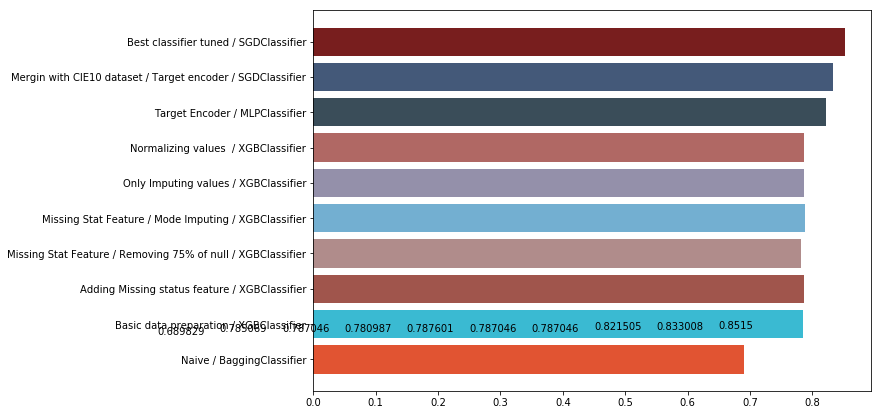

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

clist = ['#de411b', '#0ac3e6', '#c31900', '#9BB4BE', '#379BD7', '#eb6961', '#233237', '#285078','#690505']
n_colors = len(clist)
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)


fig, ax = plt.subplots(figsize=(10,7))
key_index = np.arange(len(experiments['Label'].values))
plt.barh(experiments['Label'], experiments['score'], alpha=0.9, color=rvb(key_index/n_colors))
xlocs, xlabs = plt.xticks()
for i, v in enumerate(experiments['score'].values):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

plt.show()
